In [375]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('spam-_1_.csv')

In [ ]:
df.head()

In [ ]:
df.shape

# Cleaning the data

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.rename(columns={'v1':'Output','v2':'Input'},inplace=True)
df.head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Output']=encoder.fit_transform(df['Output'])
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True) 

In [ ]:
df.isnull().sum()

In [ ]:
#check for duplicate values
df.duplicated().sum()

In [ ]:
#remove duplicate value
df=df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

# Exploratory Data Analysis

In [ ]:
df.head()

In [ ]:
df['Output'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
 
plt.pie(df['Output'].value_counts(), labels=['m','ms'], autopct="%0.2f%%")
plt.title('Distribution of Output')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

In [ ]:
df['num_characters'] = df['Input'].apply(lambda x: len(str(x)))

In [ ]:
df.head()

In [ ]:
df['no._of_words']=df['Input'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df['no._of_sentences']=df['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Output']==0]['num_characters'])
sns.histplot(df[df['Output']==1]['num_characters'])

In [ ]:
sns.pairplot(df,hue='Output')

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

In [ ]:
correlation_matrix 

In [ ]:
sns.heatmap(correlation_matrix,annot=True )

DATA Preprocessing
-Lower case
-removing special characters
-removing stop words and punctuation
-tokenization

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
import string

In [ ]:
def transform_text(text):
    text=text.lower()
    text =nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
            
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text =y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
transform_text("hi How zoro lecture watchoing")

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

In [ ]:
df['transformed_input']=df['Input'].apply(transform_text)

In [ ]:
pip install wordcloud


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['Output']==1]['transformed_input'].str.cat(sep=" "))

In [ ]:
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc=wc.generate(df[df['Output']==0]['transformed_input'].str.cat(sep=" "))

In [ ]:
plt.imshow(ham_wc)
plt.show()

In [ ]:
df.head()

In [ ]:
print(df.columns)


In [ ]:
spam_corpus = []  
for msg in df[df['Output'] == 1]['transformed_input'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
cnt=pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.figure(figsize=(8, 6))
sns.barplot(data=cnt, x=0, y=1)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
ham_corpus = []  
for msg in df[df['Output'] == 0]['transformed_input'].tolist():
 
    for word in msg.split():
        ham_corpus.append(word)



In [ ]:
len(ham_corpus)

In [ ]:
ham_wc=wc.generate(df[df['Output']==0]['transformed_input'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [ ]:
from collections import Counter
cnt=pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize=(8, 6))
sns.barplot(data=cnt, x=0, y=1)
plt.xticks(rotation='vertical')

plt.show()

# MODEL BUILDING

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_input']).toarray()

In [ ]:
X.shape

In [ ]:
y = df['Output'].values

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [376]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9630434782608696
[[822   7]
 [ 27  64]]
0.9014084507042254


In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [381]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [382]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ETC': etc,
    'GBDT':gbdt,

}

In [383]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [384]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9684782608695652, 0.9428571428571428)

In [398]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9684782608695652
Precision -  0.9428571428571428
For  KN
Accuracy -  0.9304347826086956
Precision -  1.0
For  DT
Accuracy -  0.941304347826087
Precision -  0.8245614035087719
For  LR
Accuracy -  0.9576086956521739
Precision -  0.8823529411764706
For  RF
Accuracy -  0.9739130434782609
Precision -  0.9466666666666667
For  ETC
Accuracy -  0.9815217391304348
Precision -  0.9625
For  GBDT
Accuracy -  0.9586956521739131
Precision -  1.0


In [399]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [400]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.930435,1.000000
6,GBDT,0.958696,1.000000
5,ETC,0.981522,0.962500
4,RF,0.973913,0.946667
0,SVC,0.968478,0.942857
3,LR,0.957609,0.882353
2,DT,0.941304,0.824561


In [429]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [430]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.930435
1,GBDT,Accuracy,0.958696
2,ETC,Accuracy,0.981522
3,RF,Accuracy,0.973913
4,SVC,Accuracy,0.968478
5,LR,Accuracy,0.957609
6,DT,Accuracy,0.941304
7,KN,Precision,1.000000
8,GBDT,Precision,1.000000
9,ETC,Precision,0.962500


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


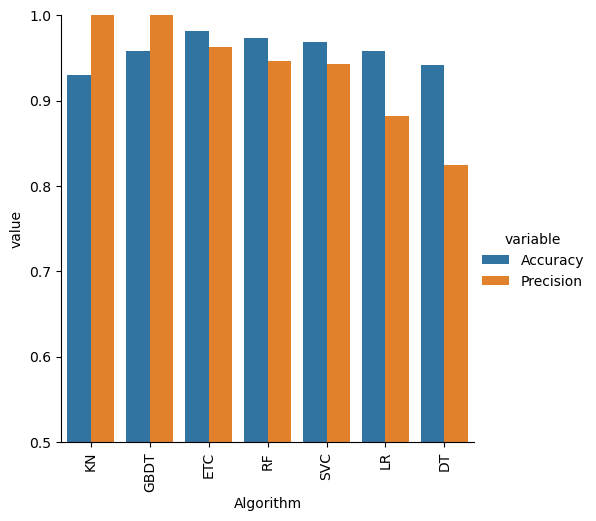

In [431]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [445]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [447]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [413]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [414]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9782608695652174
Precision 0.9733333333333334


In [415]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [416]:

from sklearn.ensemble import StackingClassifier

In [448]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [418]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9793478260869565
Precision 0.9090909090909091


In [419]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))